<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/Mod_4_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mod 4 Lab 3

###Q1. Change batch size in mini-batch gradient descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


Text(0, 0.5, 'y')

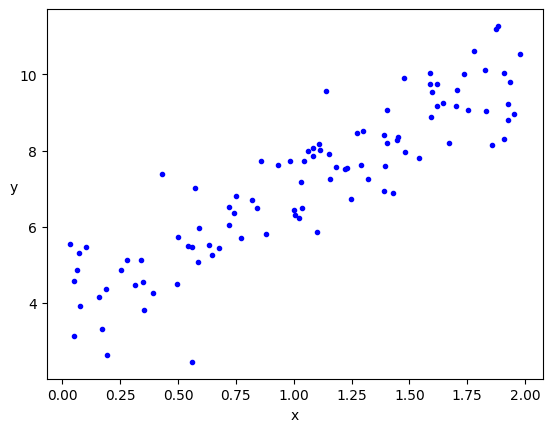

In [6]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

In [8]:
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [10]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history


In [11]:
lr = 0.01
n_iter = 1000
y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)


In [12]:
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.705
y_pred[1]: 3.269
Final error: 0.400


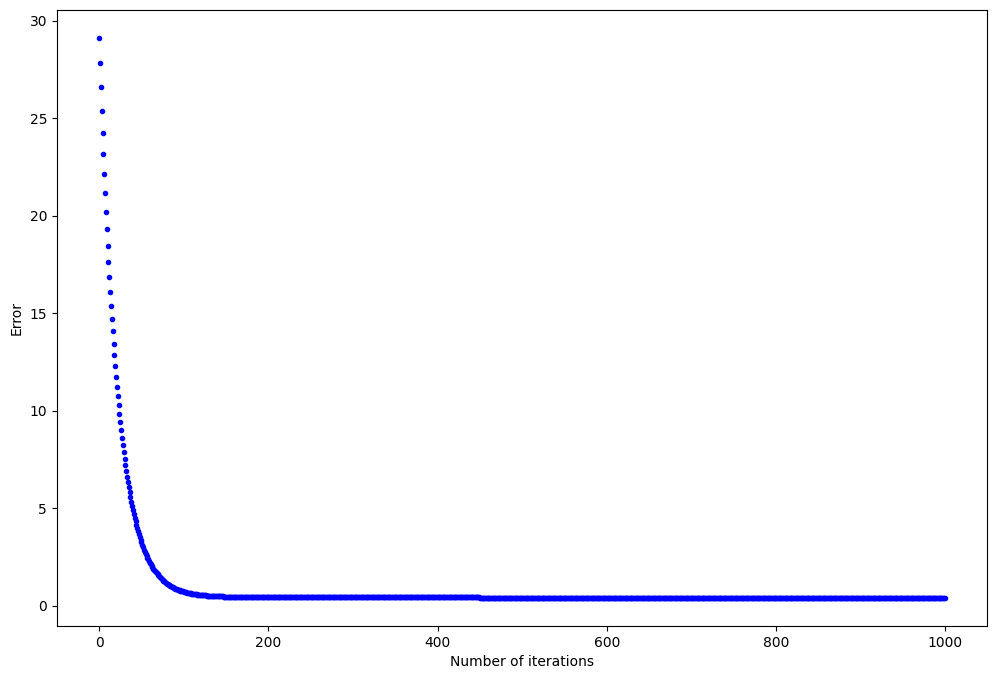

In [13]:

fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history, 'b.')


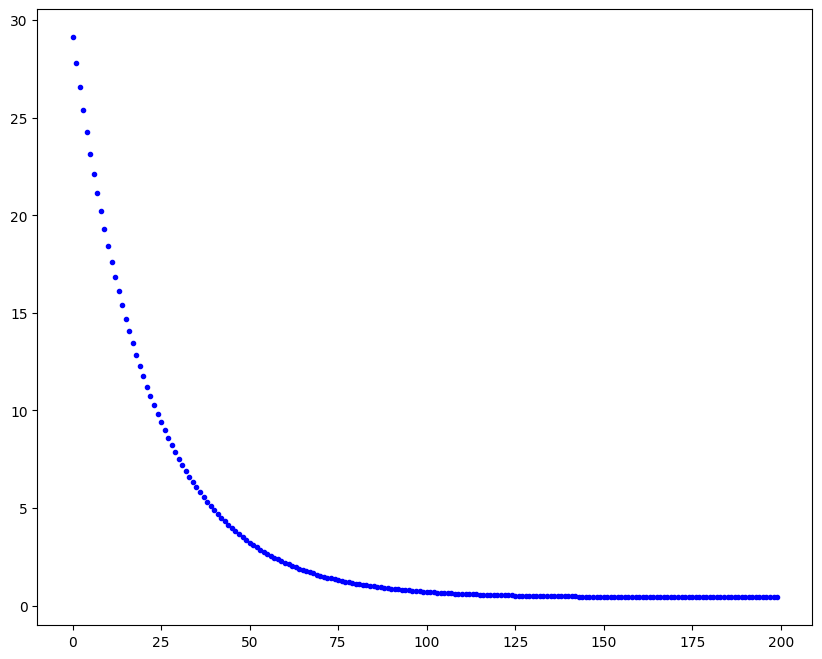

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')


In [17]:
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history


In [18]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stochastic_gradient_descent(X_b, y, y_pred, lr, n_iter)


In [19]:

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 3.945
y_pred[1]: 3.104
Final error: 29.763


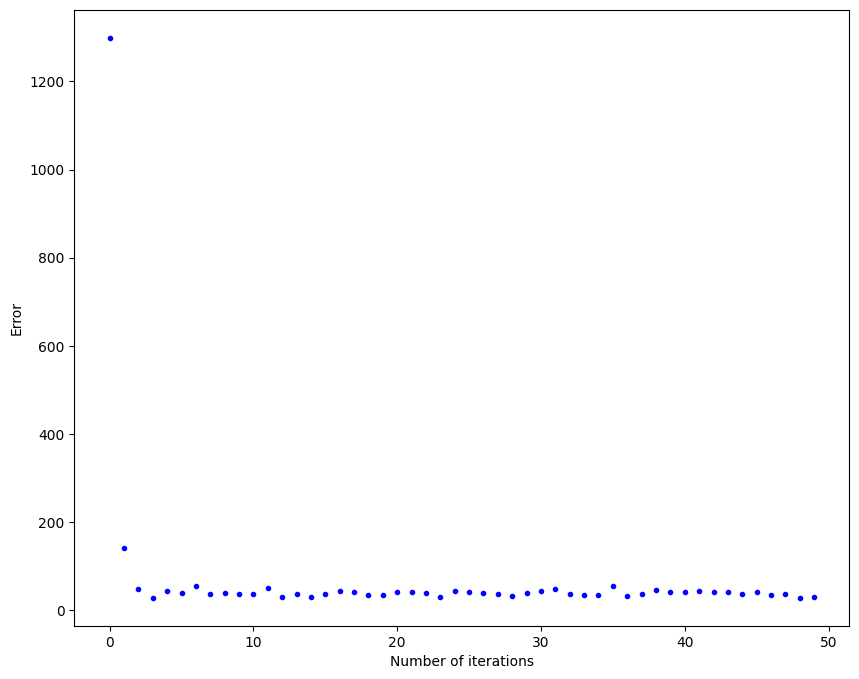

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history, 'b.')


In [21]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history



In [22]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
batch_size = 30  # Adjust the batch size here
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)


In [23]:
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: 3.852
y_pred[1]: 3.150
Final error: 1.522


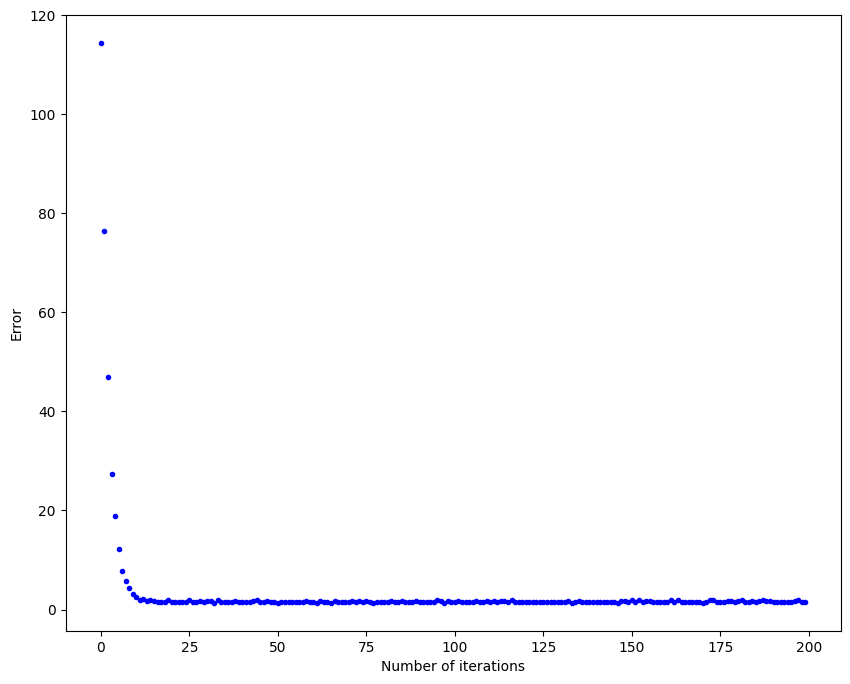

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history, 'b.')


In [25]:
plt.show()

##Q2.Test all the three out on real datasets.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

Load the California Housing dataset

In [31]:
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target.reshape(-1, 1)


Standardize the features

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


Set hyperparameters

In [33]:
lr = 0.01
n_iter = 1000
batch_size = 30

Initialize parameters

In [34]:
np.random.seed(42)
y_pred = np.random.randn(X.shape[1] + 1, 1)


Batch Gradient Descent

In [36]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, y_pred.shape[0]))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.flatten()
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history


Stochastic Gradient Descent

In [37]:
y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_b, y, y_pred, lr, n_iter)


Mini-batch Gradient Descent

In [38]:
y_pred_mini_batch, cost_history_mini_batch = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)


Plot the results

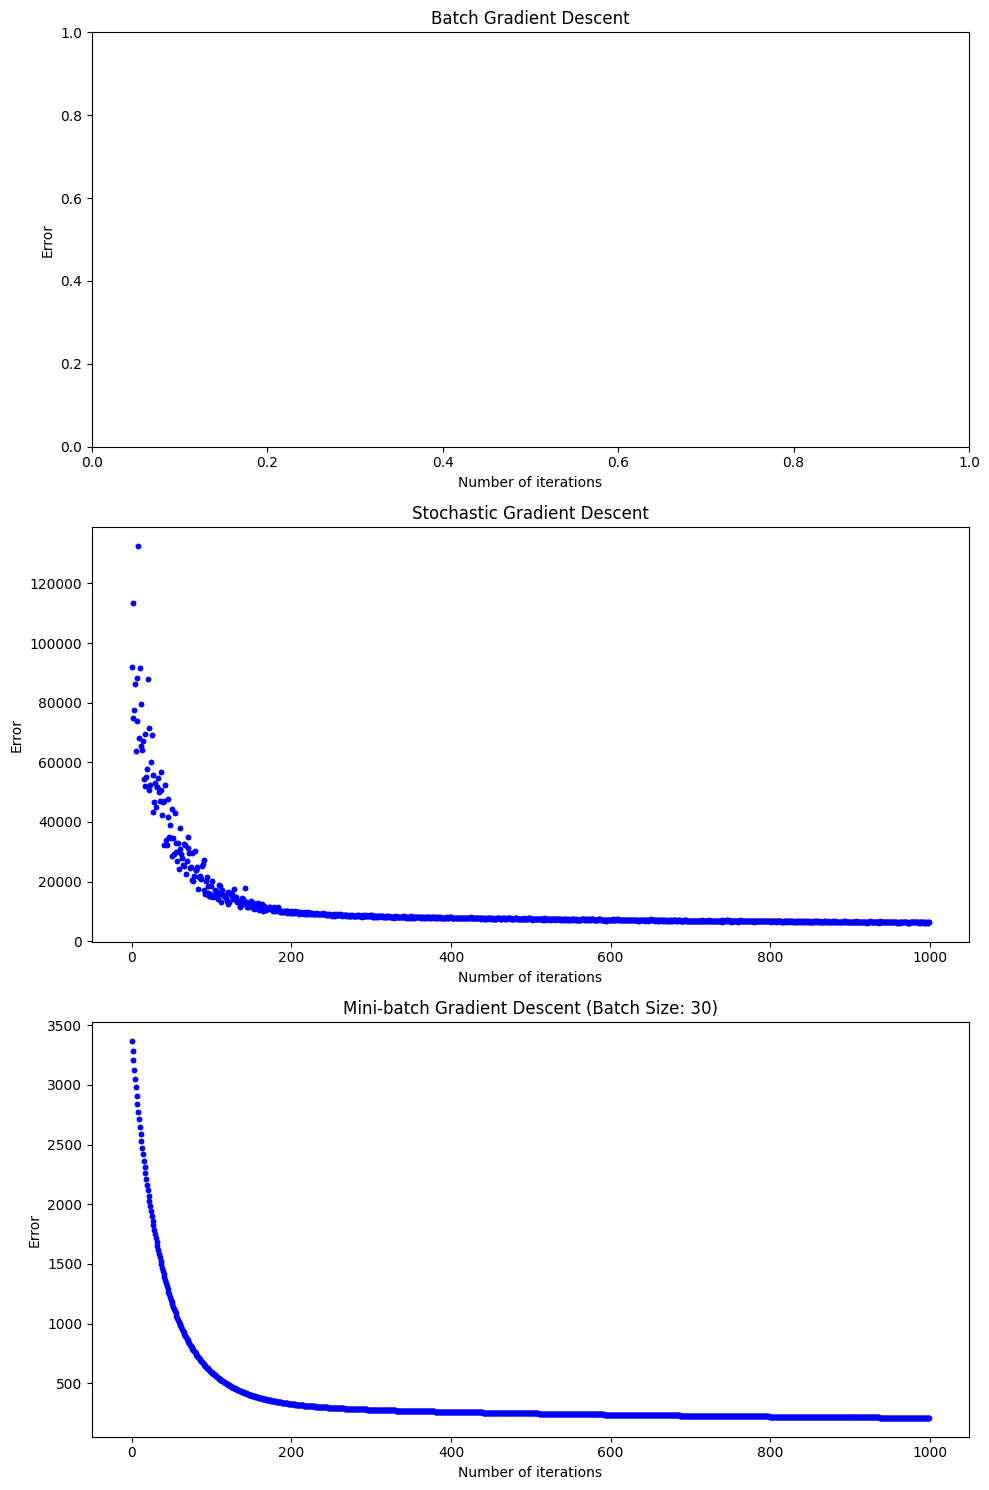

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

ax1.set_title('Batch Gradient Descent')
ax1.set_ylabel('Error')
ax1.set_xlabel('Number of iterations')
ax2.plot(range(n_iter), cost_history_stochastic.ravel(), 'b.')
ax3.plot(range(n_iter), cost_history_mini_batch.ravel(), 'b.')


ax2.set_title('Stochastic Gradient Descent')
ax2.set_ylabel('Error')
ax2.set_xlabel('Number of iterations')
ax2.plot(range(n_iter), cost_history_stochastic, 'b.')

ax3.set_title(f'Mini-batch Gradient Descent (Batch Size: {batch_size})')
ax3.set_ylabel('Error')
ax3.set_xlabel('Number of iterations')
ax3.plot(range(n_iter), cost_history_mini_batch, 'b.')

plt.tight_layout()
plt.show()